# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
from collections import OrderedDict
from IPython.display import display
from pymystem3 import Mystem
from collections import Counter
import matplotlib.pyplot as plt
m = Mystem()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.simplefilter('ignore')

Импортируем нужные нам библиотеки для работы

In [2]:
df = pd.read_csv('real_estate_data.csv', sep='\t')
df.info()
df.isna().mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

In [3]:
display(df.head(5), df.tail(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Вывод

Для понимания полученных нами данных, мы вывели общую информацию о датасете, среднее кол-во пропусков, первые 5 строчек датасета и последние 5 строчек датасета. Мы обнаружили пропуски в следующих столбцах: **ceiling_height**, **floors_total**, **living_area**, **is_apartment**, **kitchen_area**, *balcony*, *locality_name*, *airports_nearest*, *cityCenters_nearest*, *parks_around3000*, *parks_nearest*, *ponds_around3000*, *ponds_nearest*, *days_exposition*. Пропуски в *floors_total* составляю менее одного процента, поэтому если мы их заменим на среднее значение по столбцу они не повлияют на качество исследования. А пропуски в столбце *days_exposition* мы оставим, так как заменить их доставерно мы не можем, а пропущеных данных меньше одного процента


### Шаг 2. Предобработка данных

In [4]:
df['balcony'] = df['balcony'].fillna(0)

Пропущенные значения в столбце балконы, логично будет заменить пропуски на 0, так как верояно, если в квартире нет балкона респонденты могли просто этого не указать

In [5]:
df['ceiling_height'] = df['ceiling_height'].fillna(2.8)
df['ceiling_height'] = df['ceiling_height'].round(1)

Пропуски в *ceiling_height* мы заменим на значение **2,8**, это средняя величина потолков в домах по СПб и ЛО, согласно сайту spbguru.ru, предугадать точные значения нет возможности,

In [6]:
df['is_apartment'] = df['is_apartment'].fillna('False')

Со столбцом апартаменты поступим следующим образом, так как апартаменты являются не жилой недвижимостью люди при размещении объявления указывали бы обязательно этот пункт при продаже апартаментов. Исходя из этого мы заполнили все пропущенные значение на **False**

In [7]:
df['floors_total'] = df['floors_total'].fillna(df['floors_total'].mean()).round(0)
#df.query('rooms == "0"')

Пропуски в *floors_total* составляю менее одного процента, поэтому мы их заменили на среднее значение по столбцу они не повлияют на качество исследования.

In [8]:
df['living_area'] = df.groupby('rooms')['living_area'].transform(lambda x: x.fillna(x.median()))
df['kitchen_area'] = df.groupby('rooms')['kitchen_area'].transform(lambda x: x.fillna(x.median()))
df['kitchen_area'] = df['kitchen_area'].fillna(0)

Пропущенные значение в столбцах *kitchen_area* и *living_area* мы заменили по одному примеру. Замену мы произвели следующим образом. Мы сгрупировали эти площади по количеству комнам и посчитали для них медианое значение, дале произвели замени по каждой группе своим значением

Пропущенные значение в столбцах *airports_nearest*, *cityCenters_nearest*, *parks_around3000*, *parks_nearest*, *ponds_around3000*, *ponds_nearest*, *days_exposition* мы оставим с пропусками, так как найти закономерность для достоверной замены мы не можем из-за нехватки данных. Вероятнее всего продавцы квартир не заполняли данные поля так как посчитали эту информацию не важной для будущих покупателей.

In [9]:
df['locality_name'] = df['locality_name'].str.lower()
display(df.isna().mean())
print('Количество дубликатов:', df.duplicated().sum())

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.000000
floors_total            0.000000
living_area             0.000000
floor                   0.000000
is_apartment            0.000000
studio                  0.000000
open_plan               0.000000
kitchen_area            0.000000
balcony                 0.000000
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

Количество дубликатов: 0


В конце мы проверили столбец *locality_name* к нижнему регистру и проверили итоговые значения на дубликаты. Дубликатов в нашем датасете не обнаружилось и это ХОРОШО =)

In [10]:
df['locality_name'] = df['locality_name'].fillna('не известно')
def lemm_locality_name(text):
    lemmas = m.lemmatize(text)
    text = ' '.join(lemmas)
    return text
df['locality_name'] = df['locality_name'].apply(lemm_locality_name)
list_for_count = [string.split(' ') for string in df['locality_name'].values]
def lemmas_counter(list_for_lemmas):
    purpose_lemmas = []
    for row in list_for_lemmas:
        for col in row:
            purpose_lemmas.append(col)
    return purpose_lemmas
lemmatised_list = lemmas_counter(list_for_count)
summ_locality_name = Counter(lemmatised_list)
summ_locality_name = OrderedDict(sorted(summ_locality_name.items(), key=lambda x: x[1], reverse = True))
display(summ_locality_name)
#санкт-петербург
#муриный
#кудрово
#шушары
#всеволожск
#пушкин
#колпино
#парголовый
#гатчина
#выборг

OrderedDict([('\n', 23699),
             ('санкт-петербург', 15721),
             ('', 10540),
             ('поселок', 2660),
             ('деревня', 945),
             ('муриный', 590),
             ('городской', 550),
             ('кудрово', 472),
             ('шушары', 440),
             ('всеволожск', 398),
             ('пушкин', 369),
             ('тип', 363),
             ('колпино', 338),
             ('парголовый', 327),
             ('гатчина', 307),
             ('выборг', 237),
             ('село', 210),
             ('петергоф', 201),
             ('красный', 190),
             ('новый', 187),
             ('сестрорецк', 183),
             ('девяткино', 144),
             ('сертолово', 142),
             ('ломоносов', 133),
             ('кириши', 125),
             ('бугор', 114),
             ('сланцы', 112),
             ('волхов', 111),
             ('сосновый', 105),
             ('кингисепп', 104),
             ('тосно', 104),
             ('бор', 101),
       

In [11]:
def new_locality_name(names):
    if "санкт-петербург" in names:
        return 'санкт-петербург'
    if "муриный" in names:
        return 'мурино'
    if "кудрово" in names:
        return 'кудрово'
    if "шушары" in names:
        return 'шушары'
    if "всеволожск" in names:
        return 'всеволожск'
    if "пушкин" in names:
        return 'пушкин'
    if "колпино" in names:
        return 'колпино'
    if "парголовый" in names:
        return 'парголово'
    if "гатчина" in names:
        return 'гатчина'
    if "выборг" in names:
        return 'выборг'
    else:
        return 'прочие населенные пункты'
df['locality_name'] = df['locality_name'].apply(new_locality_name)
df['locality_name'].unique()

array(['санкт-петербург', 'шушары', 'прочие населенные пункты',
       'парголово', 'мурино', 'пушкин', 'кудрово', 'колпино', 'гатчина',
       'выборг', 'всеволожск'], dtype=object)

### Шаг 3. Посчитайте и добавьте в таблицу

На данном этапе нам предстоит доработать наш датасет, чтобы в дальнейшем было проще и удобнее с ним работать. Добавим следующие столбцы:
* цена квадратного метра;
* поменяем формат даты на: день недели, месяц и год публикации объявления;
* категория этажей
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [12]:
df['price_m2'] = (df['last_price'] / df['total_area']).round(0)

Добавим в наш датасет столбец с ценой за квадратный метр и округлим до целого числа

In [13]:
#df['first_day_exposition'].value_counts()
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT')
df['day_of_week_exposition'] = df['first_day_exposition'].dt.day_name()
df['month_exposition'] = df['first_day_exposition'].dt.month_name()
df['year_exposition'] = df['first_day_exposition'].dt.year
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,day_of_week_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.0,8,False,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0,Thursday,March,2019
1,7,3350000.0,40.4,2018-12-04,1,2.8,11.0,18.6,1,False,False,False,11.0,2.0,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82921.0,Tuesday,December,2018
2,10,5196000.0,56.0,2015-08-20,2,2.8,5.0,34.3,4,False,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92786.0,Thursday,August,2015


Просмотрев все значения в столбце *first_day_exposition*, мы увидели, что время публикации везде одинаковое, значит эту информацию можно отбросить и оставить формат вот таким: 2019-03-07

In [14]:
df['living_area/total_area'] = (df['living_area'] / df['total_area']).round(2)
df['kitchen_area/total_area'] = (df['kitchen_area'] / df['total_area']).round(2)
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,day_of_week_exposition,month_exposition,year_exposition,living_area/total_area,kitchen_area/total_area
0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.0,8,False,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0,Thursday,March,2019,0.47,0.23
1,7,3350000.0,40.4,2018-12-04,1,2.8,11.0,18.6,1,False,False,False,11.0,2.0,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82921.0,Tuesday,December,2018,0.46,0.27
2,10,5196000.0,56.0,2015-08-20,2,2.8,5.0,34.3,4,False,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92786.0,Thursday,August,2015,0.61,0.15
3,0,64900000.0,159.0,2015-07-24,3,2.8,14.0,45.0,9,False,False,False,9.5,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.0,Friday,July,2015,0.28,0.06
4,2,10000000.0,100.0,2018-06-19,2,3.0,14.0,32.0,13,False,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,Tuesday,June,2018,0.32,0.41


Мы добавили в наш датасет два столба: отношение жилой площади к общей площади и отношение площади кухни к общей площади. Округлили значения до сотых для удобства дальнейшей обработки значений.

In [15]:
for row in range(len(df)):
    if df.loc[row, 'floor'] == 1:
        df.loc[row, 'floor_class'] = 'первый'
    if df.loc[row, 'floor'] == df.loc[row, 'floors_total']:
        df.loc[row, 'floor_class'] = 'последний'
    if (df.loc[row, 'floor'] != 1) & (df.loc[row, 'floor'] != df.loc[row, 'floors_total'] ):
        df.loc[row, 'floor_class'] = 'другой'
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,day_of_week_exposition,month_exposition,year_exposition,living_area/total_area,kitchen_area/total_area,floor_class
0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.0,8,False,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0,Thursday,March,2019,0.47,0.23,другой
1,7,3350000.0,40.4,2018-12-04,1,2.8,11.0,18.6,1,False,False,False,11.0,2.0,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82921.0,Tuesday,December,2018,0.46,0.27,первый
2,10,5196000.0,56.0,2015-08-20,2,2.8,5.0,34.3,4,False,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92786.0,Thursday,August,2015,0.61,0.15,другой
3,0,64900000.0,159.0,2015-07-24,3,2.8,14.0,45.0,9,False,False,False,9.5,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.0,Friday,July,2015,0.28,0.06,другой
4,2,10000000.0,100.0,2018-06-19,2,3.0,14.0,32.0,13,False,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,Tuesday,June,2018,0.32,0.41,другой


In [16]:
convert_dict = {'last_price':int, 'floors_total':int, 'is_apartment':bool, 'balcony':int}
df = df.astype(convert_dict)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23699 non-null  int64         
 1   last_price               23699 non-null  int64         
 2   total_area               23699 non-null  float64       
 3   first_day_exposition     23699 non-null  datetime64[ns]
 4   rooms                    23699 non-null  int64         
 5   ceiling_height           23699 non-null  float64       
 6   floors_total             23699 non-null  int64         
 7   living_area              23699 non-null  float64       
 8   floor                    23699 non-null  int64         
 9   is_apartment             23699 non-null  bool          
 10  studio                   23699 non-null  bool          
 11  open_plan                23699 non-null  bool          
 12  kitchen_area             23699 n

Для категоризации наших объявлений по этажам мы разделили их на 3 категории:
* первый 
* последний
* другой

Данная категоризация пригодятся нам для дальнейших исследований.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

 **4.1 Изучим следующие параметры: площадь, цену, число комнат и высоту потолков. Построим для этого графики и выявим закономерности исходя из графических данных**


count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

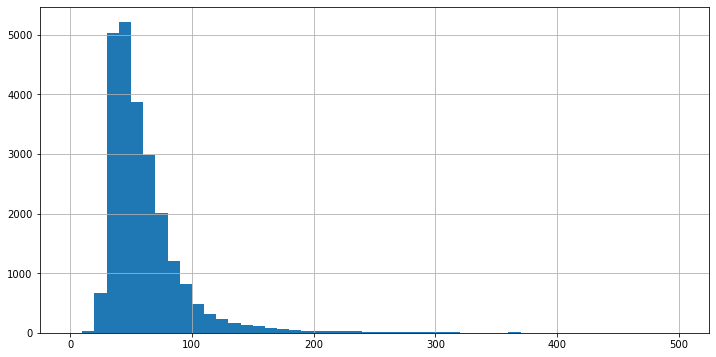

In [17]:
display(df['total_area'].describe())
df['total_area'].hist(bins=50, range=(0, 500), figsize=(12, 6) )
plt.show()

По данной гистограмме отчетливо видно, что большинство объявлений это квартиры с площадью до 200 метров квадратных. Остальные значению уже выбивающиеся и очень редкие. Самые популярные квартиры находятся в диапазоне 40 - 60 метров квадратных. Также мы видим небольшой всплеск возле нуля, скорее всего это маленькие квартиры студии общая площадь которых не превышает 15 метров квадратных

count    23699.000000
mean        65.415488
std        108.870133
min          0.121900
25%         34.000000
50%         46.500000
75%         68.000000
max       7630.000000
Name: last_price, dtype: float64

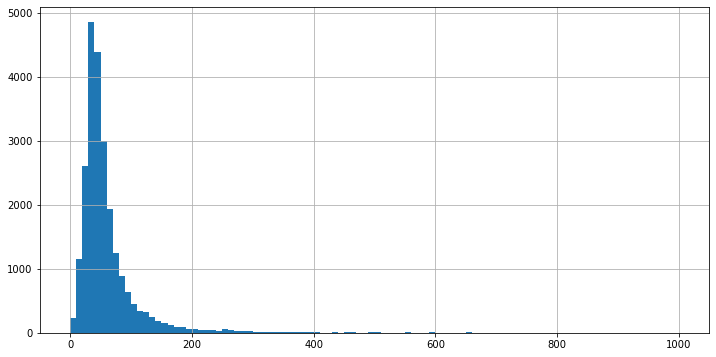

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,day_of_week_exposition,month_exposition,year_exposition,living_area/total_area,kitchen_area/total_area,floor_class
8793,7,12190,109.0,2019-03-20,2,2.8,25,32.0,25,True,False,False,40.5,0,санкт-петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0,112.0,Wednesday,March,2019,0.29,0.37,последний


In [18]:
df_price = df['last_price'] / 100000
display(df_price.describe())
df_price.hist(bins=100, range=(0, 1000), figsize=(12, 6) )
plt.show()
display(df.query('last_price < 200000'))

Из данной гистограммы мы можем сделать вывод, что стоимость квартир располагается в диапазоне 1 000 000 до 400 000 000, остальные значения являются выбивающимися. Также возле нуля есть подозрительны всплеск, вероятно это квартиры до 1 000 000 рублей. Также есть одно аномальное значение в 120 000, мы вывели его на экран и это явно артефакт, так как стоимость квартиры аномально низкая при общей площади 109 метров квардратных.

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

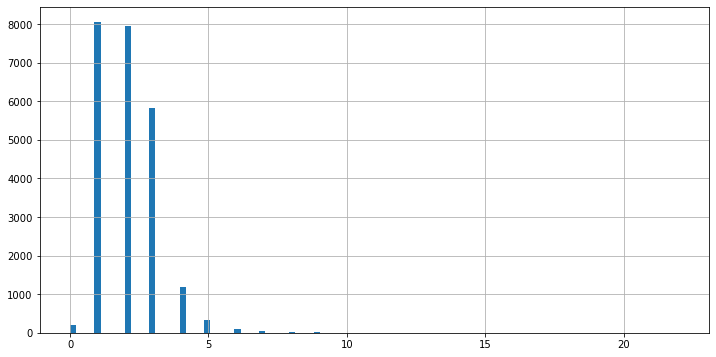

In [19]:
display(df['rooms'].describe())
df['rooms'].hist(bins=100, range=(0, 22), figsize=(12, 6) )
plt.show()

Из данной гистограммы видно, что количество комнат в нашей дальнейшей выборке будет 0-8, после 8 комнат значения получаются выбивающиеся. Вероятнее всего такие значения это редкие элетные квартиры, которые редко появляются в продаже. Также из-за их малого количества в Санкт-Петербурге и области они выпадают из общей картиры. Для дальнейшего анализа истользовать их не будем

count    23699.000000
mean         2.785139
std          0.986512
min          1.000000
25%          2.600000
50%          2.800000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

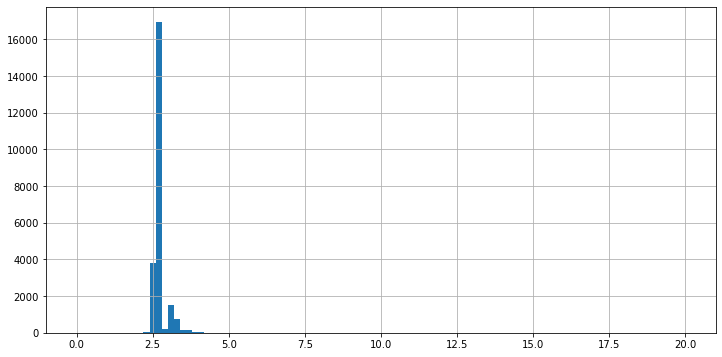

In [20]:
display(df['ceiling_height'].describe()) #df['ceiling_height'].value_counts())
df['ceiling_height'].hist(bins=100, range=(0, 20), figsize=(12, 6) )
plt.show()

По данной гистограмме мы можем сделать вывод, что самое распространенное значение высоты потолков находится в диапазоне 2,4 - 4 метра. Мы встречали и другие значения, но она все в минимальных количествах поэтому являются выбивающимися

**4.2 Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Опишим, сколько обычно занимает продажа**

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

95.0

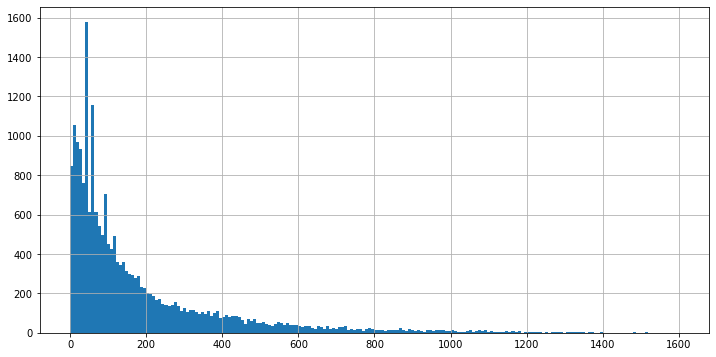

In [21]:
display(df['days_exposition'].describe(), df['days_exposition'].median())
df['days_exposition'].hist(bins=200, range=(0, 1600), figsize=(12, 6) )
plt.show()

На данной гистограмме мы видим, что наши данные имеюр распределение Пуассона. В нуле мы наблюдаем первык пик, также можно заметить большой выброс в интервали примерно 25-35 дней. Среднее значение у нас получилось - **180**, а медианое - **95**. Продажу квартиры можно считать быстрой, если она продалась за 1-8 дней и необычно долго если ее продажа составляет более 1000 дней

**4.3 Уберем редкие и выбивающиеся значения**

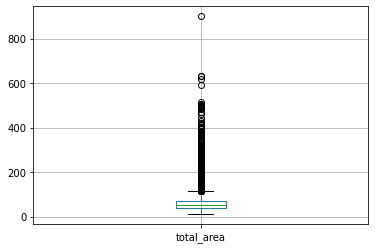

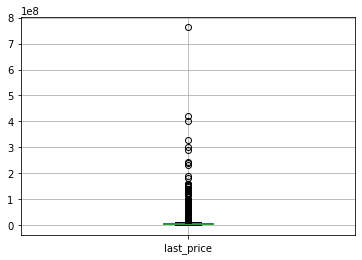

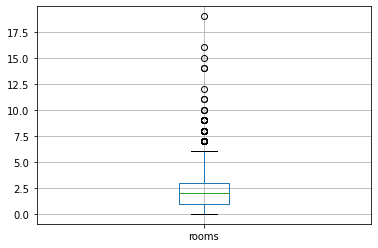

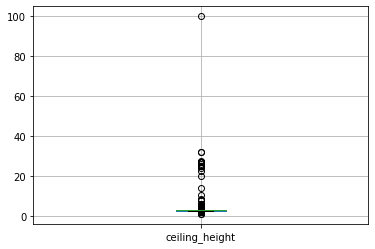

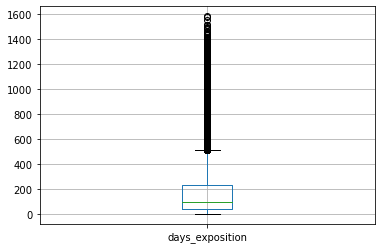

In [22]:
df.boxplot(column=['total_area'])
plt.show()
df.boxplot(column=['last_price'])
plt.show()
df.boxplot(column=['rooms'])
plt.show()
df.boxplot(column=['ceiling_height'])
plt.show()
df.boxplot(column=['days_exposition'])
plt.show()

In [23]:
df_selection = df.query('(total_area <= 600) and (200000 < last_price < 400000000) and (2.4 <= ceiling_height < 20) and (last_price > 200000)')
display(len(df_selection), len(df))


23648

23699

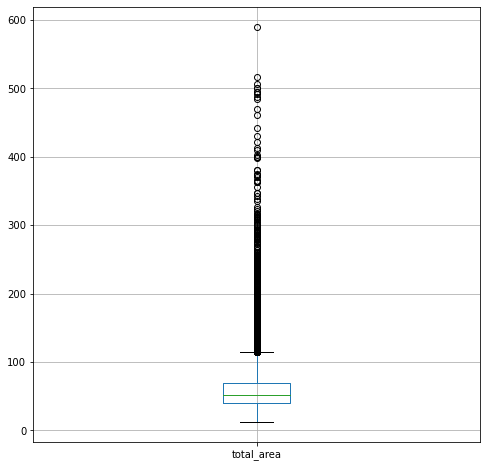

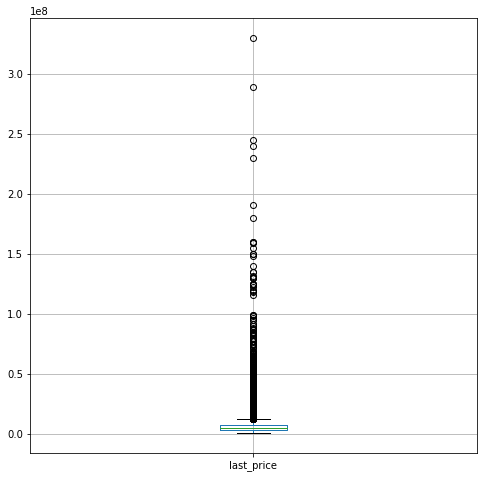

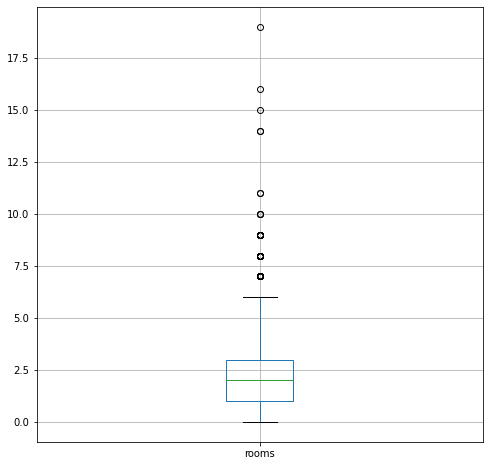

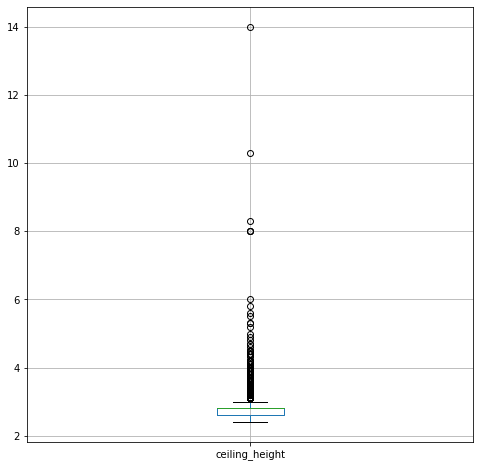

<AxesSubplot:>

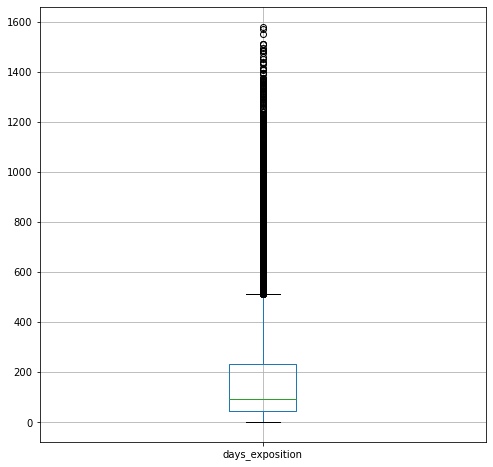

In [24]:
df_selection.boxplot(column=['total_area'], figsize=(8,8))
plt.show()
df_selection.boxplot(column=['last_price'], figsize=(8,8))
plt.show()
df_selection.boxplot(column=['rooms'], figsize=(8,8))
plt.show()
df_selection.boxplot(column=['ceiling_height'], figsize=(8,8))
plt.show()
df_selection.boxplot(column=['days_exposition'], figsize=(8,8))

С помощью графиков *boxplot* мы выявили выбиваютщиеся значения в столбах: **total_area**, **last_price**, **ceiling_height**. И после этого перепостроили новые графики, чтобы визуально оценить полученный результат. В столбце **total_area** мы отсеяли значения выше 600 метров квадратных, так как они сильно выделялись из выборки и могли повлиять на дальнейшее исследованию. В столбце **last_price** мы отсеяли одно значение, которое было выявленно ранее это подозрительно странная квартира более 100 метров квадратных, но со стоимостью 200 000 рублей и квартиры стоимость которых выше 400 000 000, так как они сильно выбивались из остальны. в столбце **ceiling_height** мы поставили фильтр, чтобы отмести странные значение менее 2.4 метров, так как такие потолки не возможны, и потолки выше 20 метров, так как они сильно выбивались из остальных данных. 

**4.4 Опишем какие факторы больше всего влияют на стоимость квартиры и изучем зависимости.
Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.**

In [25]:
df_factors = df_selection[['last_price', 'total_area', 'rooms', 'cityCenters_nearest', 'floor_class', 'days_exposition']]
#display(df_factors)
df_factors.corr()

,last_price,total_area,rooms,cityCenters_nearest,days_exposition
last_price,1.000000,0.698120,0.404177,-0.249180,0.107457
total_area,0.698120,1.000000,0.764405,-0.235184,0.154290
rooms,0.404177,0.764405,1.000000,-0.184339,0.127590
cityCenters_nearest,-0.249180,-0.235184,-0.184339,1.000000,-0.060704
days_exposition,0.107457,0.154290,0.127590,-0.060704,1.000000


По матрице корреляции мы можем сделать следующие выводы:
* Зависимость цены от площали есть. Коэффициет корреляции Пирсона равер 0.70. Чем выше стоимость тем больше становится площать квартиры.
* Зависимость цены от количество комнат есть. Коэффициет корреляции Пирсона 0.40. Чем выше стоимость тем больше будет комнат в квартире.
* Зависимость цены от удаленности от цента есть, но небольшая. Коэффициет корреляции Порсона -0.25. Чем меньше удаленность от цента тем больше будет увеличиваться цена

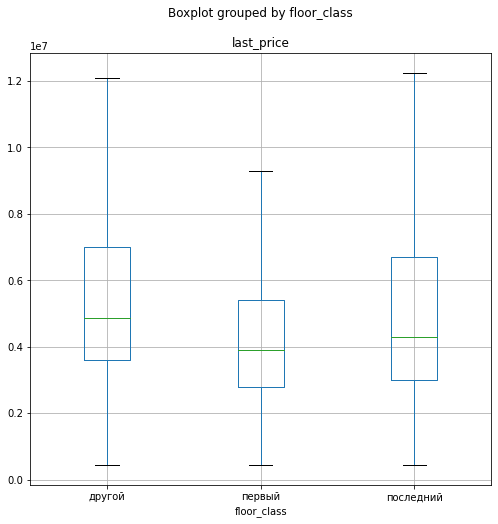

In [26]:
plot = df_selection.boxplot('last_price', by='floor_class', figsize=(8,8), showfliers=False)

Из данного графика мы можем сделать следующие выводы:
* квартиры на первых этажах дешевле
* квартиры не на первом и последнем этаже дороже остальных
* квартиры на последных этажах могут уменьшить стоимость 

<AxesSubplot:title={'center':'last_price'}, xlabel='day_of_week_exposition'>

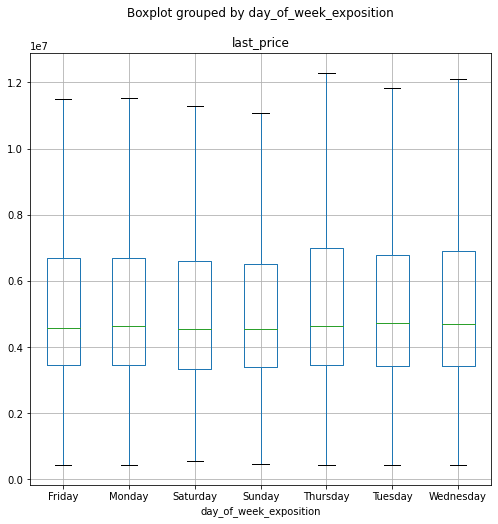

In [27]:
df_selection.boxplot('last_price', by='day_of_week_exposition', figsize=(8,8), showfliers=False)

Парадоксально, но факт. Объявления размещенные в четвер имеют цену выше чем остальные

<AxesSubplot:title={'center':'last_price'}, xlabel='month_exposition'>

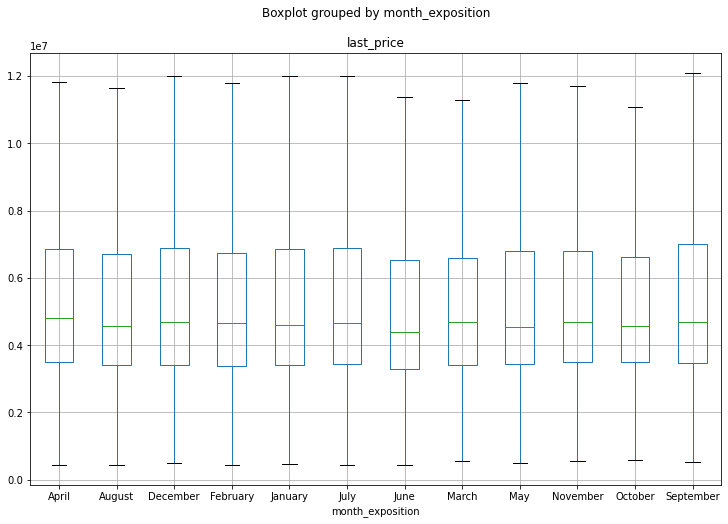

In [28]:
df_selection.boxplot('last_price', by='month_exposition', figsize=(12,8), showfliers=False)

Прямой зависимости от месяца размещения и цены мы не нашли

<AxesSubplot:title={'center':'last_price'}, xlabel='year_exposition'>

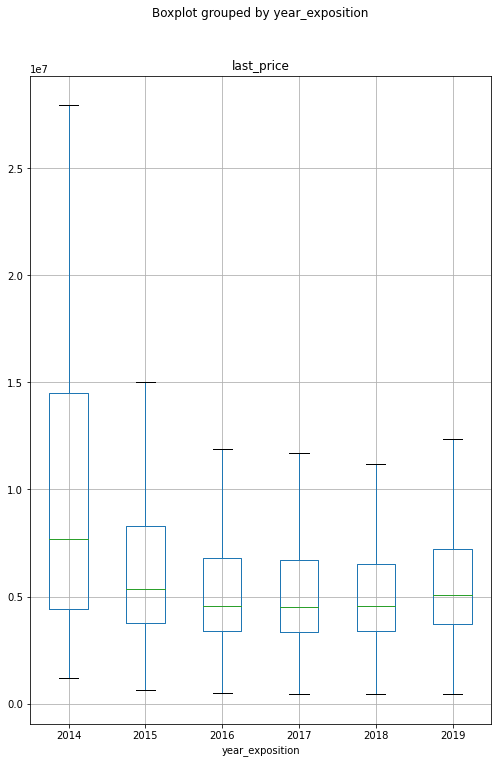

In [29]:
df_selection.boxplot('last_price', by='year_exposition', figsize=(8,12), showfliers=False)

In [30]:
#Прямой зависимости от года размещения и цены мы не обнаружили.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23699 non-null  int64         
 1   last_price               23699 non-null  int64         
 2   total_area               23699 non-null  float64       
 3   first_day_exposition     23699 non-null  datetime64[ns]
 4   rooms                    23699 non-null  int64         
 5   ceiling_height           23699 non-null  float64       
 6   floors_total             23699 non-null  int64         
 7   living_area              23699 non-null  float64       
 8   floor                    23699 non-null  int64         
 9   is_apartment             23699 non-null  bool          
 10  studio                   23699 non-null  bool          
 11  open_plan                23699 non-null  bool          
 12  kitchen_area             23699 n

**4.5 Выберирем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья.**

Чтобы найти топ 10 налесенных пунктов в нашем датафрейме мы сделали лемматизацию и посчитали количиство упоминаний готодов. Вот так выглядит наш топ:
* санкт-петербург
* мурино
* кудрово
* шушары
* всеволожск
* пушкин
* колпино
* парголовый
* гатчина
* выборг

Приведев в порядок названия и проведем дальнейший анализ нашего топа

In [31]:
top_10 = df_selection.query('locality_name != "прочие населенные пункты"')
pt = top_10.pivot_table(index = 'locality_name', values = 'price_m2', aggfunc = ['count', 'mean'])
df_top_10 = pd.DataFrame(pt.to_records())
df_top_10.columns = ['locality_name', 'count', 'price_m2_mean']
df_top_10.sort_values(by='count', ascending=False)


,locality_name,count,price_m2_mean
8,санкт-петербург,15696,114606.922464
5,мурино,588,86064.818027
4,кудрово,471,95326.205945
9,шушары,440,78677.379545
0,всеволожск,397,68719.322418
7,пушкин,369,103125.818428
3,колпино,338,75424.571006
6,парголово,327,90175.886850
2,гатчина,306,68757.643791
1,выборг,235,58238.153191


Мы выделили топ 10 населенных пунктов и посчитали для них среднюю цену квардратного метро, на перов месте у нас Санкт-Петербург с ценой за квадратный метр 114 606 рублей, а на последнем месте Выбор с ценой за квадратный метр 58 238 рублей

<AxesSubplot:title={'center':'price_m2'}, xlabel='locality_name'>

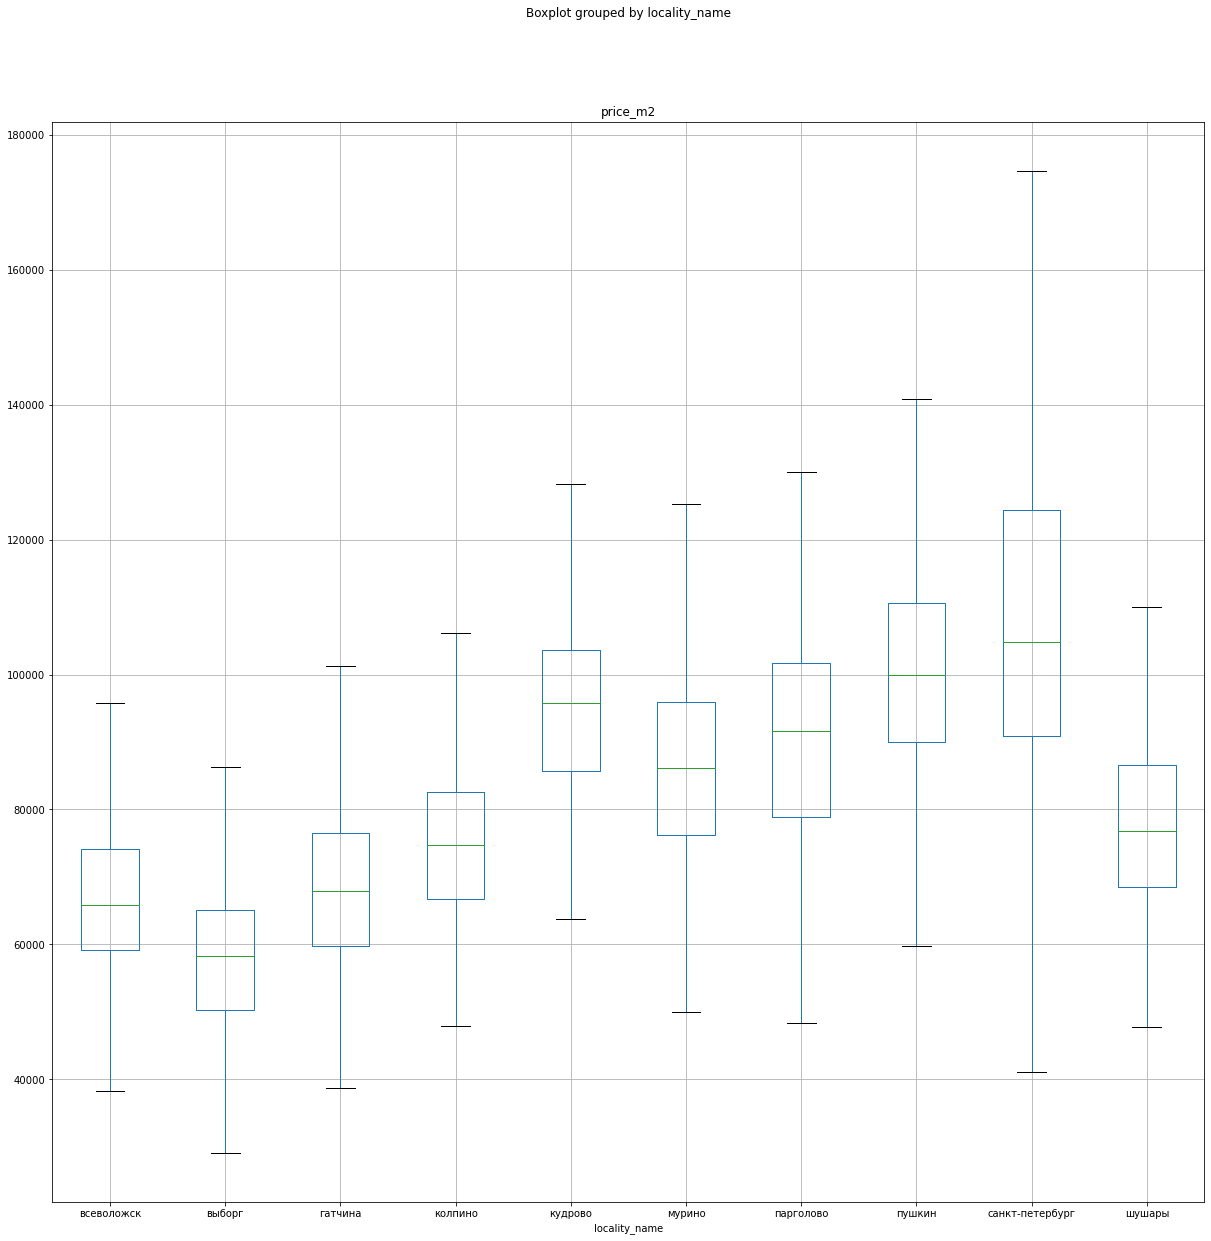

In [32]:
top_10.boxplot('price_m2', by='locality_name', figsize=(20,20), showfliers=False)

Самая высокая стоимость жилья у нас как и ожидалось в Санкт-Петербурге, а самая низкая в Выборге



**4.6 Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге и найдем пределы центра для Санкт-Петербурга**

<AxesSubplot:xlabel='cityCenters_nearest'>

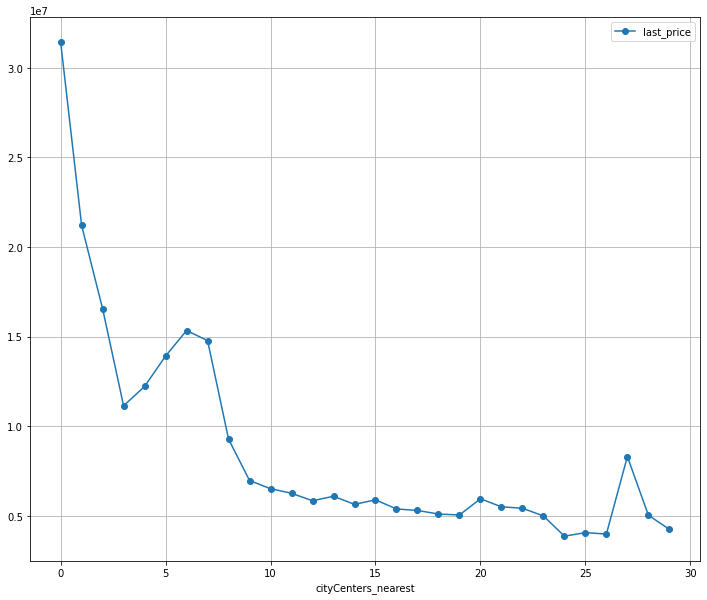

In [33]:
df_spb = df_selection.query('locality_name == "санкт-петербург"')

df_spb = df_spb.dropna(subset = ['cityCenters_nearest'])
df_spb.isna().mean()
df_spb['cityCenters_nearest'] = (df_spb['cityCenters_nearest'] / 1000).round(0)
search_centr = df_spb.pivot_table(index = 'cityCenters_nearest', values = 'last_price', aggfunc = 'mean').round(2)
df_search_centr = pd.DataFrame(search_centr.to_records())
df_search_centr.plot(x='cityCenters_nearest', y='last_price', figsize=(12,10), grid=True, style='o-')


Для определения границ центра мы построили график средней цены за один километр. Границы центра можно обозначить как 8-10 километров, так как после этих значений средня цена только уменьшается.

In [34]:
display(len(df_spb.query('cityCenters_nearest <= 10')))

5420

Границы центра Санкт-Петербурга обозначим как 8 киломметров. Подходящих для анализа квартир в центре у нас 4110

**Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков.**

In [35]:
df_centr = df_spb.query('cityCenters_nearest <= 10')
df_centr['last_price'] = df_centr['last_price'] / 1000000
df_centr.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,day_of_week_exposition,month_exposition,year_exposition,living_area/total_area,kitchen_area/total_area,floor_class
3,0,64.9,159.0,2015-07-24,3,2.8,14,45.0,9,True,False,False,9.5,0,санкт-петербург,28098.0,7.0,2.0,84.0,3.0,234.0,424.0,408176.0,Friday,July,2015,0.28,0.06,другой
4,2,10.0,100.0,2018-06-19,2,3.0,14,32.0,13,True,False,False,41.0,0,санкт-петербург,31856.0,8.0,2.0,112.0,1.0,48.0,121.0,100000.0,Tuesday,June,2018,0.32,0.41,другой
21,13,3.2,31.6,2018-03-14,1,2.8,5,16.9,2,True,False,False,5.7,1,санкт-петербург,36064.0,10.0,1.0,248.0,0.0,NaN,310.0,101266.0,Wednesday,March,2018,0.53,0.18,другой
24,8,6.5,97.2,2015-10-31,2,2.8,3,46.5,1,True,False,False,19.6,0,санкт-петербург,20052.0,2.0,3.0,411.0,3.0,124.0,265.0,66872.0,Saturday,October,2015,0.48,0.20,первый
35,6,15.5,149.0,2017-06-26,5,2.8,5,104.0,4,True,False,False,17.0,0,санкт-петербург,23670.0,4.0,0.0,NaN,1.0,779.0,644.0,104027.0,Monday,June,2017,0.70,0.11,другой


count    5420.000000
mean       82.015378
std        52.015399
min        12.000000
25%        47.975000
50%        69.550000
75%        97.800000
max       590.000000
Name: total_area, dtype: float64

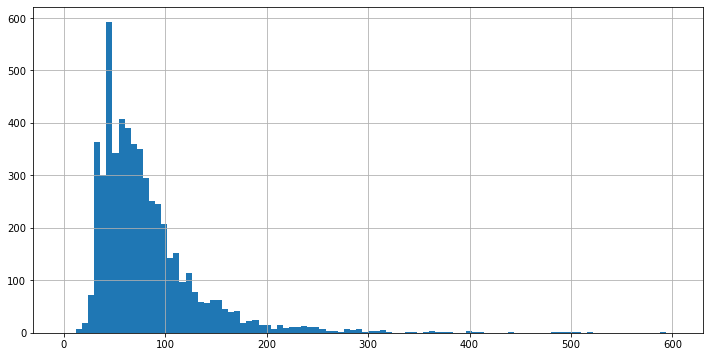

In [36]:
display(df_centr['total_area'].describe())
df_centr['total_area'].hist(bins=100, range=(0, 600), figsize=(12, 6) )
plt.show()

Из гистограммы мы видим, что у нас есть не большой всплеск возле нуля. Вероятно, это маленькие квартиры студии в центральной части города. Также мы видим большой всплеск в районе 40 метров квадратных.

count    5420.000000
mean       11.997710
std        15.938089
min         1.600000
25%         5.500000
50%         7.990000
75%        12.500000
max       330.000000
Name: last_price, dtype: float64

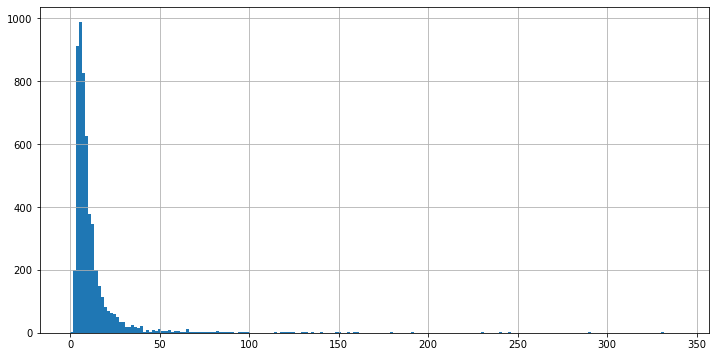

In [37]:
display(df_centr['last_price'].describe())
df_centr['last_price'].hist(bins=200, range=(0,340), figsize=(12, 6) )
plt.show()

На гисторамме стоимости мы видим встплеск возле нуля как и на предыдущей гистограмме. Это явно значения стоимости маленьких квартир студий, которые были переделаны из коммунальных квартир в центральной части города. Также мы видим много выбивающихся значений по стоимости.

count    5420.000000
mean        2.579889
std         1.362130
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64

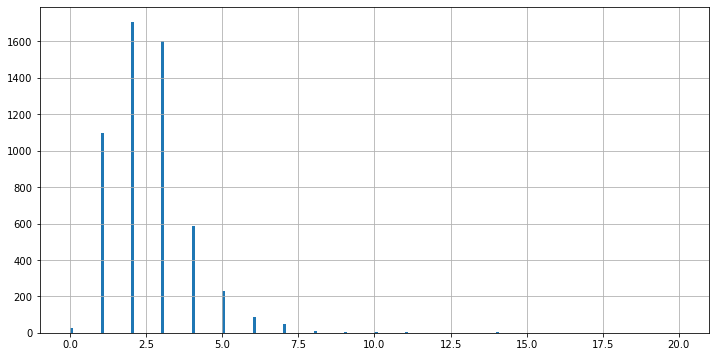

In [38]:
display(df_centr['rooms'].describe())
df_centr['rooms'].hist(bins=200, range=(0,20), figsize=(12, 6) )
plt.show()

Из предыдущих гистограмм мы сделали предположение, что в центральной части города есть часть квартир студий, переделанных из коммунальных квартир. Гипотеза подтвердилась. В центаральной части преодладают двухкомнатные и трехкомнатные квартиры и есть часть редких значений когда число комнат превышает 6

count    5420.000000
mean        2.918063
std         0.315720
min         2.400000
25%         2.800000
50%         2.800000
75%         3.000000
max         6.000000
Name: ceiling_height, dtype: float64

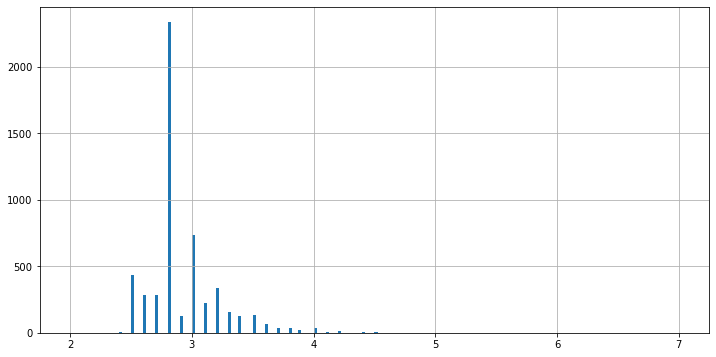

In [39]:
display(df_centr['ceiling_height'].describe())
df_centr['ceiling_height'].hist(bins=200, range=(2,7), figsize=(12, 6) )
plt.show()

Как и в других районах высота потолков в центральной части города преобладает 2,8 метра

In [41]:
df_centr_factors = df_centr[['last_price', 'total_area', 'rooms', 'cityCenters_nearest', 
                             'floor_class', 'days_exposition']]
df_centr_factors.corr()
df_not_cent = df_spb.query('cityCenters_nearest > 10')
df_not_cent_factrs = df_not_cent[['last_price', 'total_area', 'rooms', 'cityCenters_nearest', 
                                  'floor_class', 'days_exposition']]
print('Матрица корреляции для цента')
display(df_centr_factors.corr())
print('Матрица корреляции не для центра')
display(df_not_cent_factrs.corr())

Матрица корреляции для цента


,last_price,total_area,rooms,cityCenters_nearest,days_exposition
last_price,1.000000,0.678195,0.386433,-0.201623,0.114639
total_area,0.678195,1.000000,0.767378,-0.281532,0.169283
rooms,0.386433,0.767378,1.000000,-0.287217,0.149696
cityCenters_nearest,-0.201623,-0.281532,-0.287217,1.000000,-0.129970
days_exposition,0.114639,0.169283,0.149696,-0.129970,1.000000


Матрица корреляции не для центра


,last_price,total_area,rooms,cityCenters_nearest,days_exposition
last_price,1.000000,0.830818,0.511975,-0.099001,0.089448
total_area,0.830818,1.000000,0.739736,-0.007256,0.120355
rooms,0.511975,0.739736,1.000000,-0.040116,0.083360
cityCenters_nearest,-0.099001,-0.007256,-0.040116,1.000000,-0.004036
days_exposition,0.089448,0.120355,0.083360,-0.004036,1.000000


По матрице корреляции мы можем сделать следующие выводы. Если сравнить корреляцию в центральной части и в остальной части города, различия весьма не большие. Единственно отличие корреляция растояния до центра города ниже в 2 раза.


### Шаг 5. Общий вывод

Проведя исследование объявлений с яндекс.недвижимости по Санкт-Петербургу и Ленобласти мы можем сказать следующее:
* большинство пропущенных значений появились из-за того, что люди не могли понять зачем им указывать эту информацию и как она может повлиять на стоимость.
* выбивающиеся значения могут появиться из-за опечатки заполняющиего.
* выделели топ 10 населенных пунктов по количеству размещенных объявлений.
* сделали анализ влияющих на стоимость факторов как в центальной части города, так и в остальной ее части. Результат они почти не отличаются.
В дальнейшем, чтобы избежать пропущенных значенив в столбцах в растояниями до аэропора, водоемов и т.п. стоит провести анализ как эти критерии влияют на стоимоть и на основе этой информации доработать сервис яндекс.недвиживость, чтобы у пользователей было поимание для чего им стоит указывать точно данную информацию и какую выгоду от этого они смогут получить